In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('worldbank.csv')

In [3]:
data

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [4]:
data.isnull().sum()

Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64

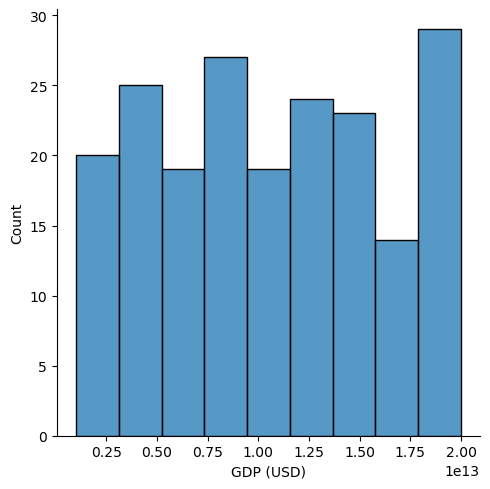

In [38]:
sns.displot(data['GDP (USD)'])

<Axes: >

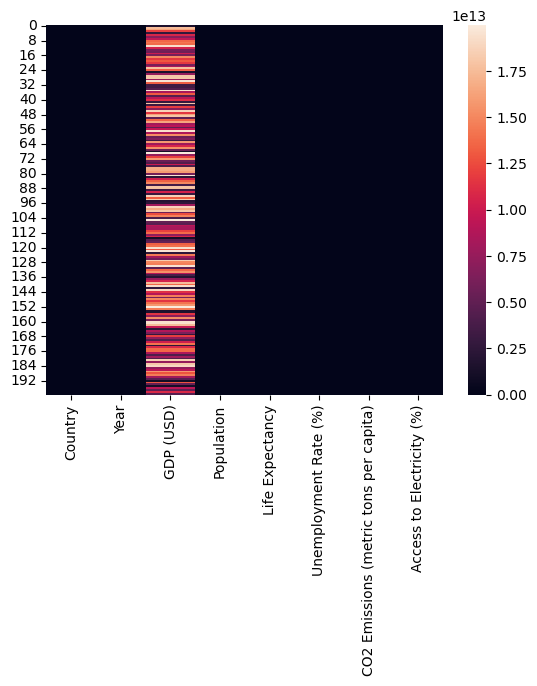

In [40]:
sns.heatmap(data)

In [5]:
y = data[['GDP (USD)']]
x = data[['Country','Year','Population','Life Expectancy','Unemployment Rate (%)','CO2 Emissions (metric tons per capita)','Access to Electricity (%)']]

In [12]:
data['Country'].value_counts()

India             15
United Kingdom    13
Indonesia         13
Saudi Arabia      13
Italy             12
France            12
Argentina         12
United States     11
Mexico            10
Canada            10
Japan             10
Nigeria            9
Turkey             9
South Africa       8
Russia             8
China              8
Germany            7
Australia          7
Brazil             7
South Korea        6
Name: Country, dtype: int64

In [15]:
data['Country'] = data['Country'].map({'India':1,
'United Kingdom':2,
'Indonesia':3,
'Saudi Arabia':4,
'Italy':5,
'France':6,
'Argentina':7,
'United States':8,
'Mexico':9,
'Canada':10,
'Japan':11,
'Nigeria':12,
'Turkey':13,
'South Africa':14,
'Russia':15,
'China':16,
'Germany':17,
'Australia':18,
'Brazil':19,
'South Korea':20})

In [16]:
y = data[['GDP (USD)']]
x = data[['Country','Year','Population','Life Expectancy','Unemployment Rate (%)','CO2 Emissions (metric tons per capita)','Access to Electricity (%)']]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [23]:
y_pred

array([[9.94684119e+12],
       [1.09543462e+13],
       [8.72787761e+12],
       [1.04543587e+13],
       [1.06880185e+13],
       [8.23461495e+12],
       [8.30210836e+12],
       [9.68882735e+12],
       [8.83369537e+12],
       [1.08204940e+13],
       [1.09243084e+13],
       [7.47697500e+12],
       [1.22379830e+13],
       [6.45961650e+12],
       [7.22443080e+12],
       [1.20946889e+13],
       [1.26501352e+13],
       [1.03976609e+13],
       [9.03309285e+12],
       [9.29945133e+12],
       [1.19240284e+13],
       [6.97319654e+12],
       [1.10643276e+13],
       [8.63779039e+12],
       [1.16393946e+13],
       [1.05179456e+13],
       [1.05306412e+13],
       [1.17107642e+13],
       [1.00898138e+13],
       [8.88632132e+12],
       [9.50726433e+12],
       [1.13236641e+13],
       [1.06192997e+13],
       [6.86175844e+12],
       [9.06262163e+12],
       [1.15959414e+13],
       [1.33536104e+13],
       [9.58358610e+12],
       [9.19805546e+12],
       [6.99375043e+12],


In [25]:
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
mse = mean_absolute_percentage_error(y_pred,y_test)

In [27]:
mse

0.5096308340952135

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [33]:
rf.fit(x_train,y_train.to_numpy().ravel())

RandomForestRegressor()

In [34]:
y_pred2 = rf.predict(x_test)

In [35]:
from sklearn.metrics import mean_absolute_percentage_error

In [63]:
mse2 = mean_absolute_percentage_error(y_pred2,y_test)
mse2

0.46619375289183346

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [65]:
from sklearn.svm import SVR

In [66]:
dc = SVR()

In [67]:
dc.fit(x_train,y_train.to_numpy().ravel())

SVR()

In [68]:
y_pred3 = dc.predict(x_test)

In [69]:
from sklearn.metrics import mean_absolute_percentage_error

In [70]:
mse3 = mean_absolute_percentage_error(y_pred3,y_test)

In [75]:
mse3

0.482029192425416

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
mn = DecisionTreeRegressor()

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [80]:
mn.fit(x_train,y_train)

DecisionTreeRegressor()

In [81]:
y_pred4 = mn.predict(x_test)

In [82]:
from sklearn.metrics import mean_absolute_percentage_error

In [83]:
mse4 = mean_absolute_percentage_error(y_pred4,y_test)

In [84]:
mse4

1.1321648269203277

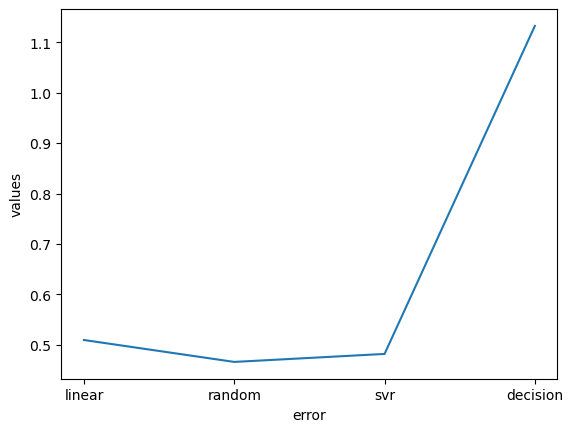

In [85]:
label =['linear','random','svr','decision']
values =[mse,mse2,mse3,mse4]
plt.plot(label,values)
plt.xlabel('error')
plt.ylabel('values')
plt.show()